<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1> 
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1> 

# 4 Estudos de Caso de Análise de Dados I
Professores: *Diego Nogare* & *Rogério de Oliveira* 

<br>
<br>

---


# Exercícios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# WHO World Health Organization

Os dados abaixo foram obtidos diretamente da Organização Mundial de Saúde. Empregue os dados de 2015 já selecionados abaixo para responder as perguntas.

In [2]:
WHO = pd.read_csv('PLP_Python_4_Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ]
WHO.head()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


# Qualidade dos Dados

Verifique a Qualidade dos Dados. Quantos atributos apresentam dados ausentes a qual atributo tem o maior percentual de dados ausentes?

In [3]:
# Seu código
WHO.rename(columns={'Total expenditure':'Total_expenditure'}, inplace=True)
display(WHO.isnull().sum())

print(f'Porcentagem itens faltando em Total expenditure: {WHO.Total_expenditure.isnull().sum()/len(WHO):.2%}')

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            177
percentage expenditure               0
Hepatitis B                          9
Measles                              0
BMI                                  2
under-five deaths                    0
Polio                                0
Total_expenditure                  181
Diphtheria                           0
 HIV/AIDS                            0
GDP                                 29
Population                          41
 thinness  1-19 years                2
 thinness 5-9 years                  2
Income composition of resources     10
Schooling                           10
dtype: int64

Porcentagem itens faltando em Total expenditure: 98.91%


# Qualidade dos Dados

Alguns países estão classificados como países *em desenvolvimento* e parecem destoar do nosso entendimento geral de países *desenvolvidos $\times$ em desenvolvimento*. Quais dois países parecem se enquadrar neste caso?

(Dica: verifique os países em desenvolvimento que apresentam um GDP que discrepante dos demais) 

In [4]:
# Seu código
GDP_Desenvolvimento=WHO[['Country','Status','GDP']]
GDP_Desenvolvimento=GDP_Desenvolvimento [ GDP_Desenvolvimento.Status == 'Developing' ]

GDP_Desenvolvimento=GDP_Desenvolvimento.loc[GDP_Desenvolvimento.GDP.nlargest(len(WHO)).index][['Country','GDP']].reset_index()
display(GDP_Desenvolvimento)

,index,Country,GDP
0,2071,Qatar,66346.522670
1,496,Canada,43315.744000
2,930,France,36526.771100
3,1266,Israel,35729.372530
4,1394,Kuwait,28975.418000
...,...,...,...
121,2151,Rwanda,71.348397
122,2007,Peru,63.343259
123,144,Azerbaijan,55.313820
124,1554,Madagascar,41.857595


# Distribuição dos Dados

Analise a Distribuição da Expectativa de Vida entre os países Desenvolvidos e em Desenvolvimento. O que você consegue afirmar sobre essas distribuições? 

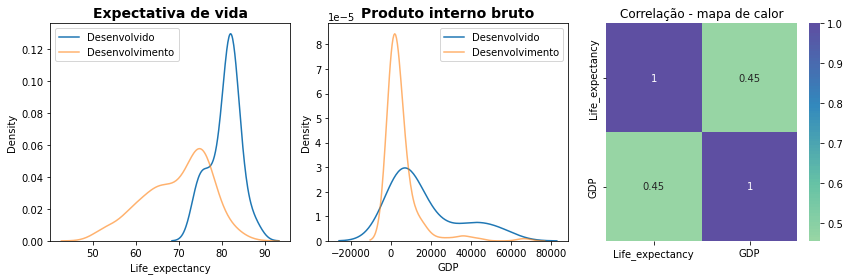

In [5]:
# Seu código
exVidaDesenvolvido=WHO [ WHO.Status == 'Developed' ]
exVidaDesenvolvimento=WHO [ WHO.Status == 'Developing' ]

# Gráfico
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.kdeplot(exVidaDesenvolvido.Life_expectancy, label='Desenvolvido')
sns.kdeplot(exVidaDesenvolvimento.Life_expectancy, alpha=0.6, label='Desenvolvimento')
plt.legend()
plt.title('Expectativa de vida',fontsize=14,weight='bold')

plt.subplot(1,3,2)
sns.kdeplot(exVidaDesenvolvido.GDP, label='Desenvolvido')
sns.kdeplot(exVidaDesenvolvimento.GDP, alpha=0.6, label='Desenvolvimento')
plt.legend()
plt.title('Produto interno bruto',fontsize=14,weight='bold')

plt.subplot(1,3,3)
WHO_selected=WHO[['Life_expectancy','GDP']]
sns.heatmap(WHO_selected.corr(), annot = True, cmap='Spectral', center=0).set_title('Correlação - mapa de calor')

plt.tight_layout()
plt.show()

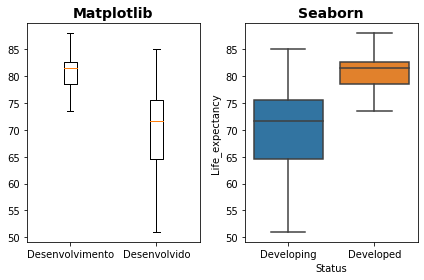

In [7]:
exVidaDesenvolvido=WHO [ WHO.Status == 'Developed' ]
exVidaDesenvolvimento=WHO [ WHO.Status == 'Developing' ]

plt.subplot(1,2,1)
plt.boxplot(exVidaDesenvolvido.Life_expectancy, positions=[0])
plt.boxplot(exVidaDesenvolvimento.Life_expectancy, positions=[1])
plt.title('Matplotlib',fontsize=14,weight='bold')
plt.xticks(ticks=[0,1],labels=['Desenvolvimento','Desenvolvido'])

plt.subplot(1,2,2)
sns.boxplot(x='Status', y='Life_expectancy', data=WHO)
plt.title('Seaborn',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()

# Relações

Quais índices aparecem como mais correlacionados a Expectativa de Vida dos países em Desenvolvimento?  

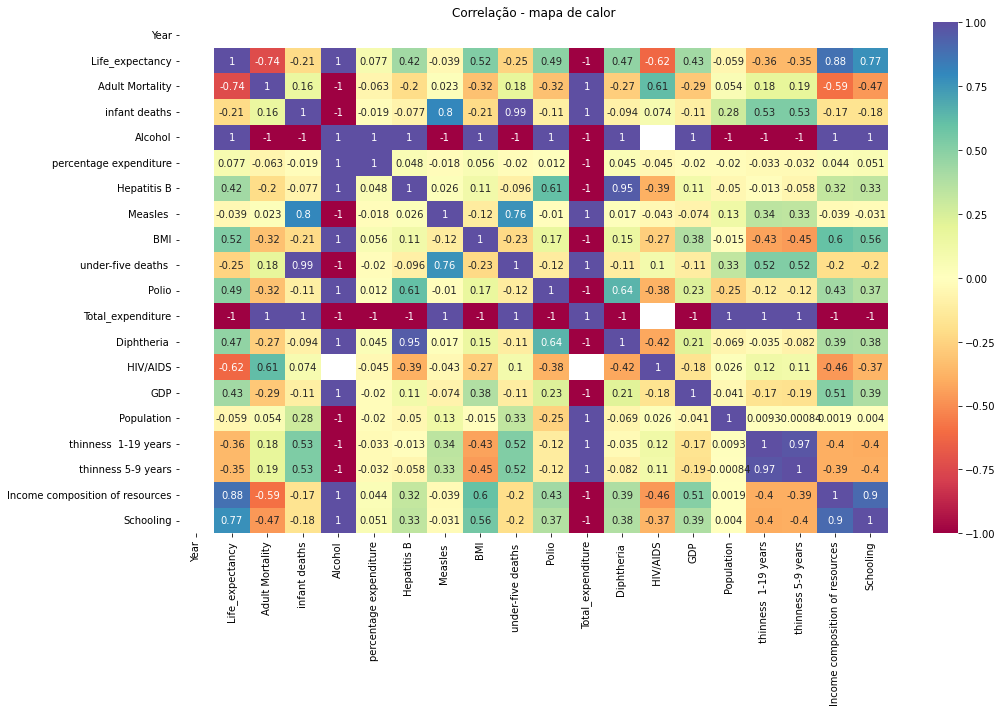

In [8]:
# Seu código
WHO_developing=WHO [ WHO.Status == 'Developing' ]

plt.figure(figsize=(15,10))
plt.subplot(1,1,1)
sns.heatmap(WHO_developing.corr(), annot = True, cmap='Spectral', center=0).set_title('Correlação - mapa de calor')

plt.tight_layout()
plt.show()

# Ranking

Qual a posição do Brasil no Ranking de Escolaridade (`Schooling`) com relação aos demais países? 

In [9]:
# Seu código
WHO.loc[WHO.Schooling.nlargest(len(WHO)).index][['Country','Schooling']].reset_index()[37:43]

,index,Country,Schooling
37,208,Barbados,15.3
38,1667,Mauritius,15.2
39,352,Brazil,15.2
40,1732,Montenegro,15.1
41,2135,Russian Federation,15.0
42,1346,Kazakhstan,15.0
